In [1]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as tck
import numpy as np
from numpy.fft import fft
from scipy.signal import find_peaks

D2Ss = ["0"+str(n) for n in range(2,9)]


This booklet is for the analysis of the signals coming from a CMB for every channel. **Be sure to modify the following address, arrcondigly to where the files are stored on your computer**


In [2]:
D2S = D2Ss[0]
address_selected = f"C:\\Users\\User\\Desktop\\flab\\D2S tests\\cmb03_wrd01\\d2s{D2S}_ch*.csv"

Be sure to set a sensible saving address, while using the next function

In [4]:
def plot_D2S(D2S,  legend = True, save = False):
    fig, ax = plt.subplots(figsize=(15,6))
    address = address_selected
    all_channels = glob.glob(address)
    all_df = [pd.read_csv(file_channel, skiprows=9, comment='#') for file_channel in all_channels]
    for i, df in enumerate(all_df):
        ax.plot(df['Time (s)']*1e3, df['Channel 3 (V)'], label=f"channel_{i}")
    ax.set_xlabel("Milliseconds [ms]", fontsize=20)
    ax.set_ylabel("Waveform [V]", fontsize=20)
    ax.set_title(f"D2S BOARD {D2S}: all waveforms", fontsize=20)
    ax.set_xlim(-0.7, 0.7)
    if legend:
        fig.legend()
    fig.show()
    if save:
        fig.savefig("C://Users//User//Desktop//flab//D2S tests//cmb03_wrd01//signals//d2s"+str(D2S))
        

C:\Users\User\AppData\Local\Temp\ipykernel_25672\239557463.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_25672\239557463.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_25672\239557463.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_25672\239557463.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_25672\239557463.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_25672\239557463.py:14: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
C:\Users\User\AppData\Local\Temp\ipykernel_25672\239557463.py:14: UserWarning: Fig

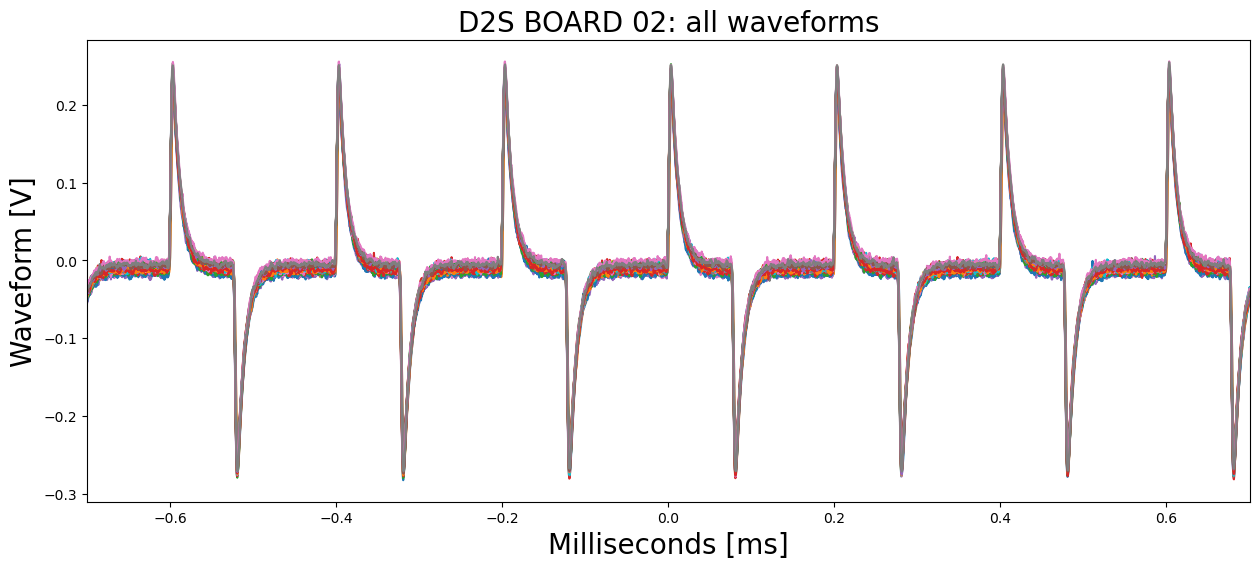

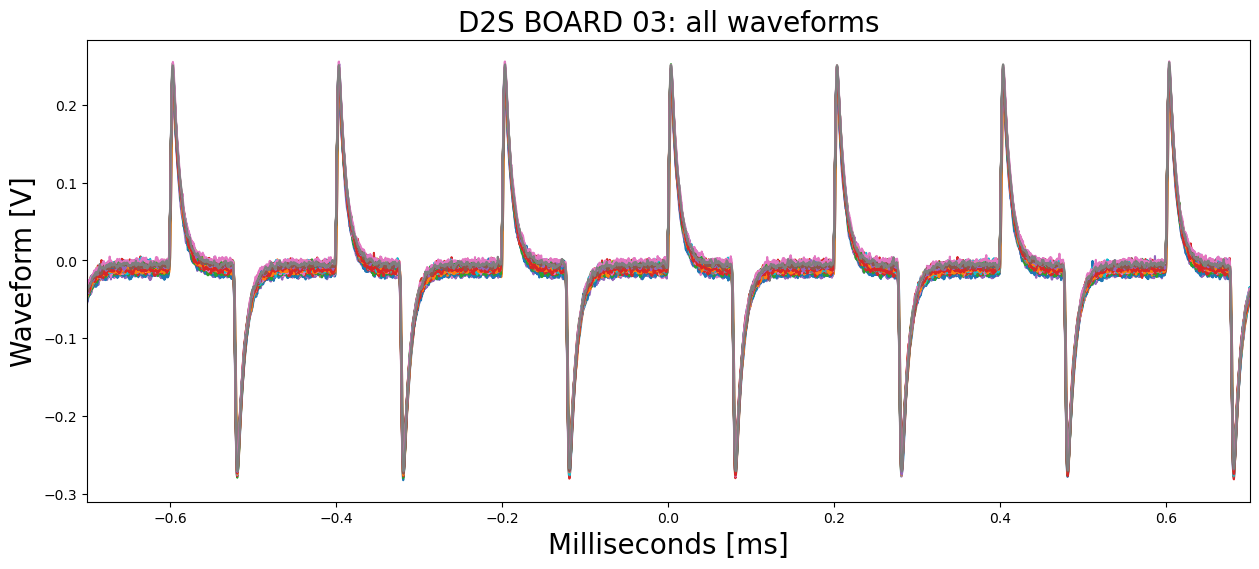

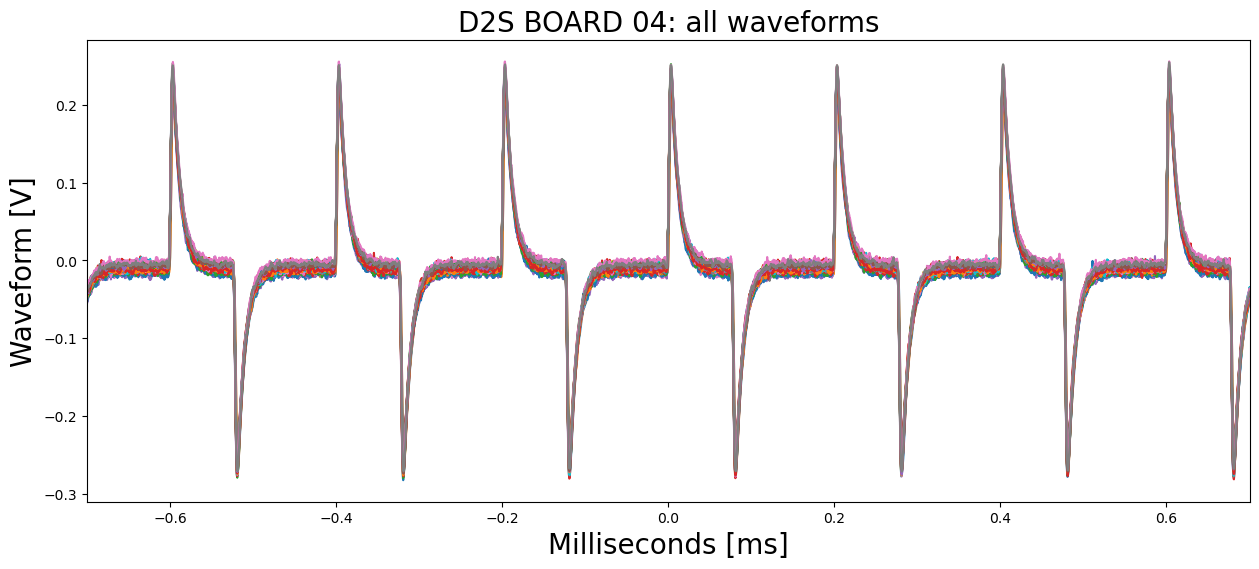

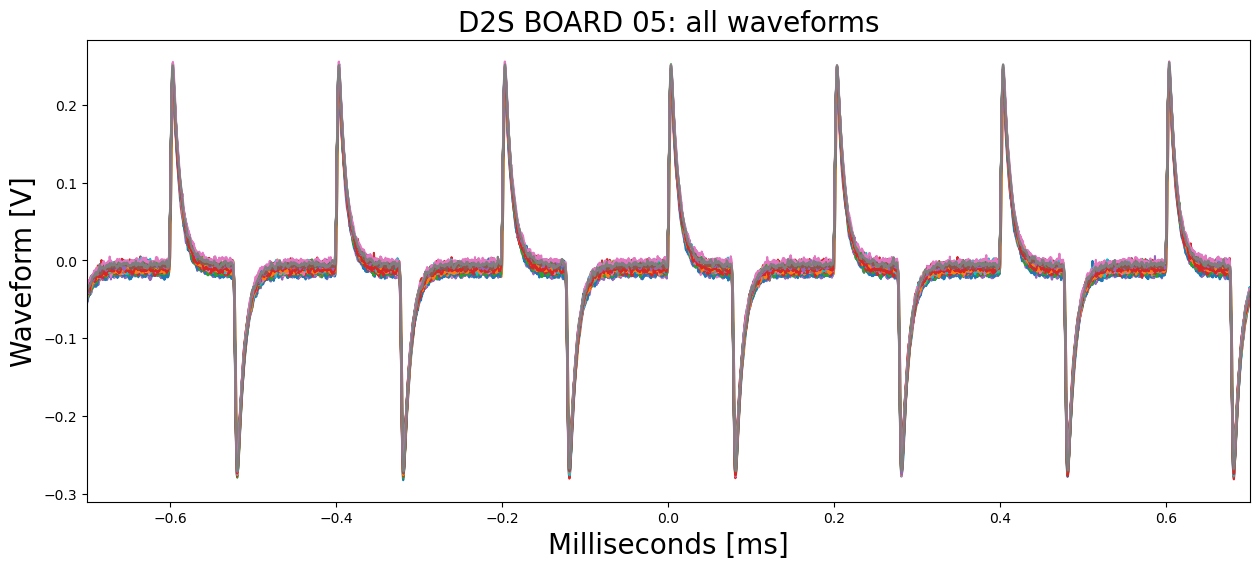

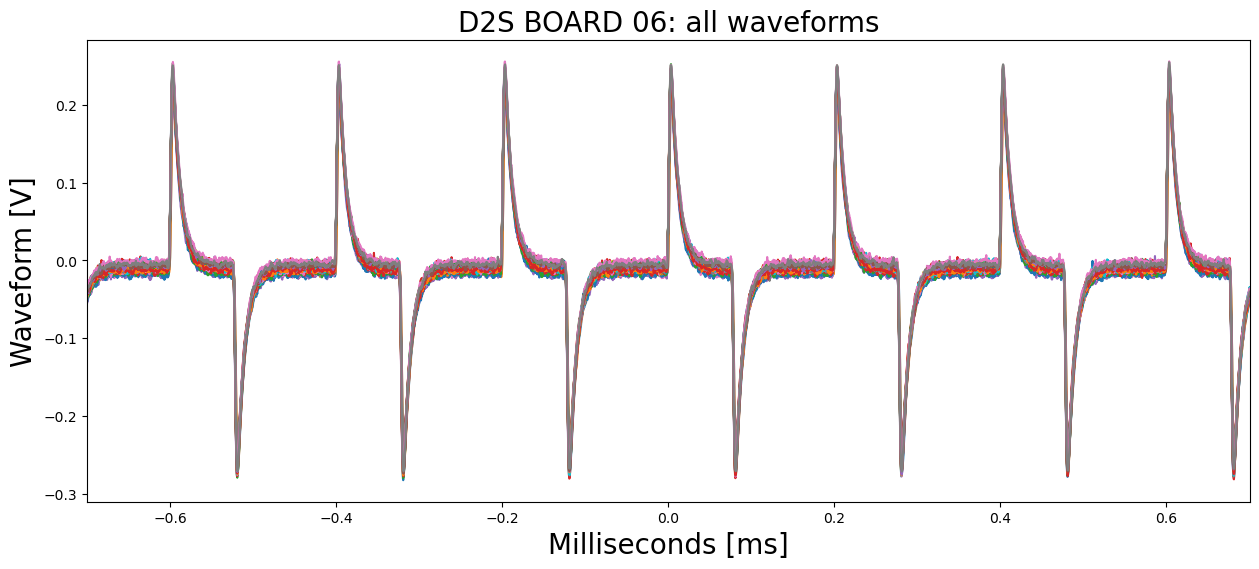

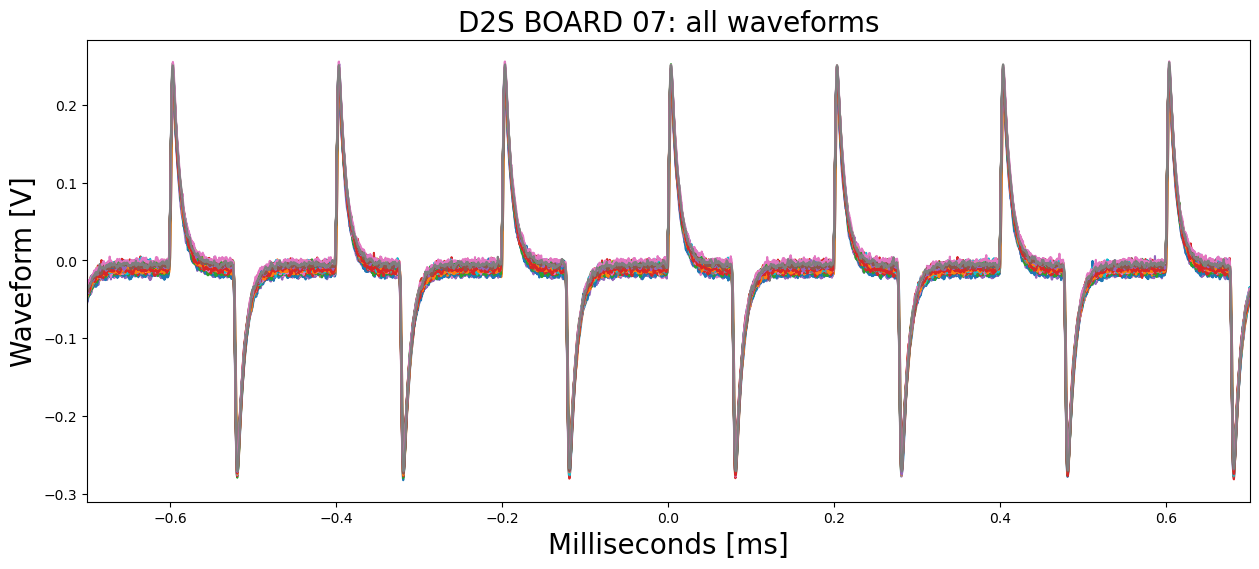

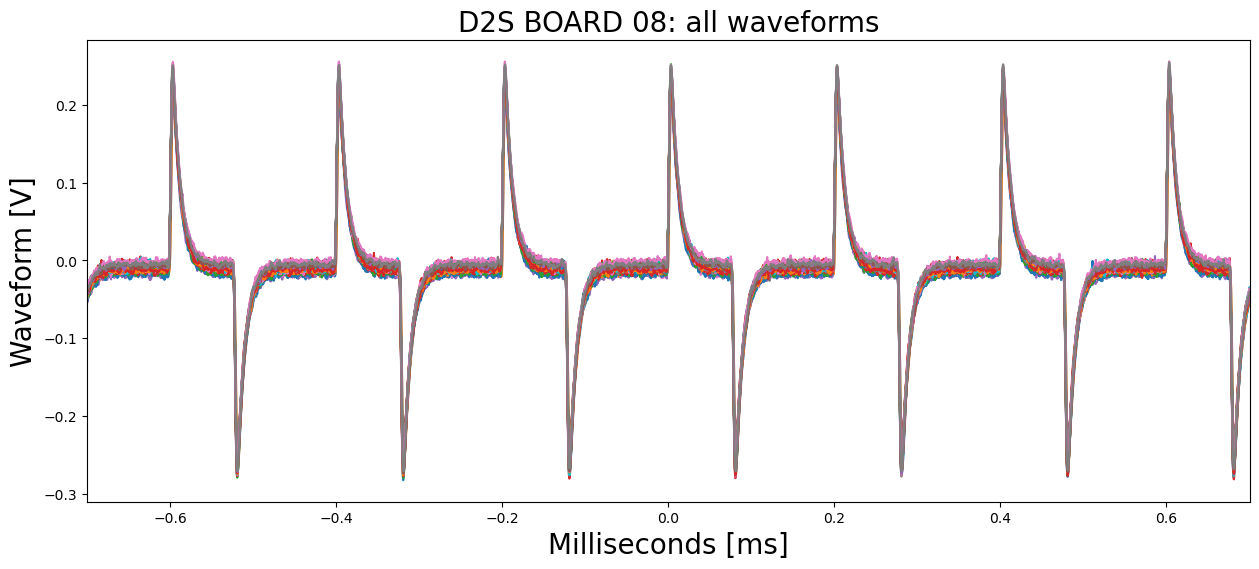

In [5]:
for board in D2Ss:
    plot_D2S(board, False, True)


To use this specific function, it is needed to modify the line *address* 

In [37]:
def plot_D2S_selected(D2S,channel,  show = True):
    fig, ax = plt.subplots(figsize=(15,6))
    
    address = f"C:\\Users\\User\\Desktop\\flab\\D2S tests\\cmb03_wrd01\\d2s{D2S}_ch"+channel+".csv"
    df = pd.read_csv(address, skiprows=9, comment='#') 
    ax.plot(df['Time (s)']*1e3, df['Channel 3 (V)'], label=f"channel_{i}")
    ax.set_xlabel("Milliseconds [ms]", fontsize=20)
    ax.set_ylabel("Waveform [V]", fontsize=20)
    ax.set_title(f"D2S BOARD {D2S}: all waveforms", fontsize=20)
    ax.set_xlim(-0.7, 0.7)
    if show:
        fig.legend()
        fig.show()
        
        

In [47]:
def plot_double(x, y, name,legend = False, save = False, address_save = None):

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))
    ax1.scatter(x, y)
    ax1.set_xlabel("Channel", fontsize=20)
    ax1.set_ylabel("Amplitude [V] ($V_{pp}$)", fontsize=20)
    fig.suptitle(f"D2S BOARD {name}: amplitude vs channel", fontsize=20)
    ax1.grid()
    ax1.xaxis.set_major_locator(tck.MultipleLocator(2))
    ax1.tick_params(rotation = 30)
    ax1.set_xlim(-1,48)
    ax1.set_ylim(0.1,0.6)
    
    ax2.hist(y)
    ax2.set_xlabel("Amplitude $V_{pp}$ [V]")
    if legend:
        ax1.legend()
    if save:
        plt.savefig(address_save)

In [ ]:
all_channels = glob.glob(address)
all_df = [pd.read_csv(file_channel, skiprows=9, comment='#') for file_channel in all_channels]

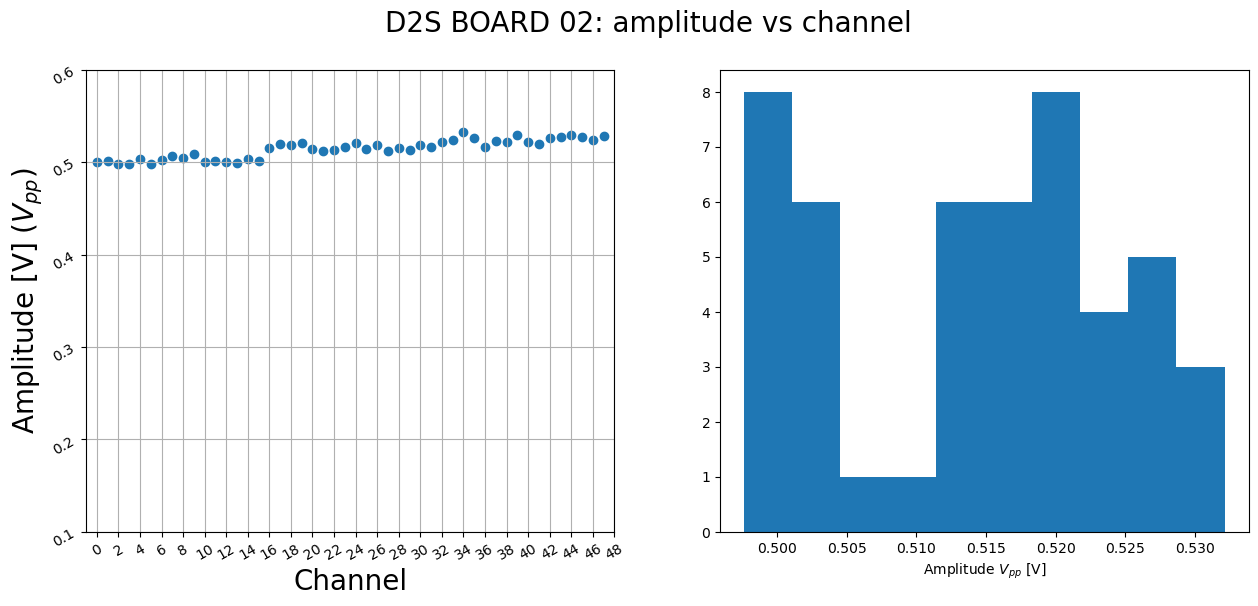

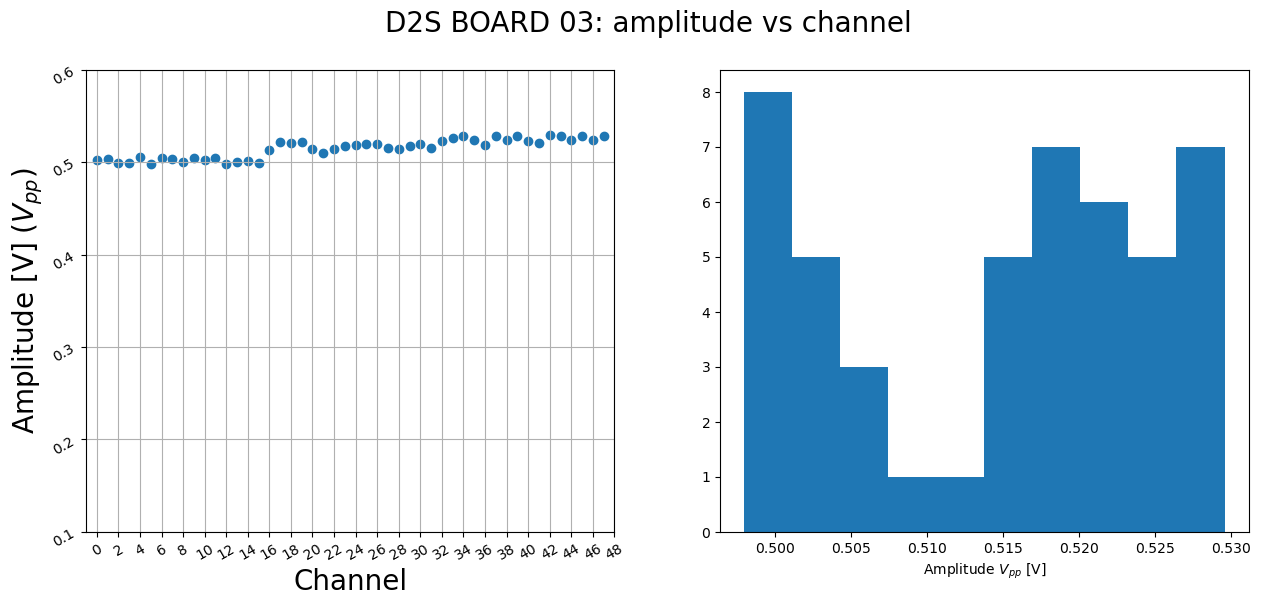

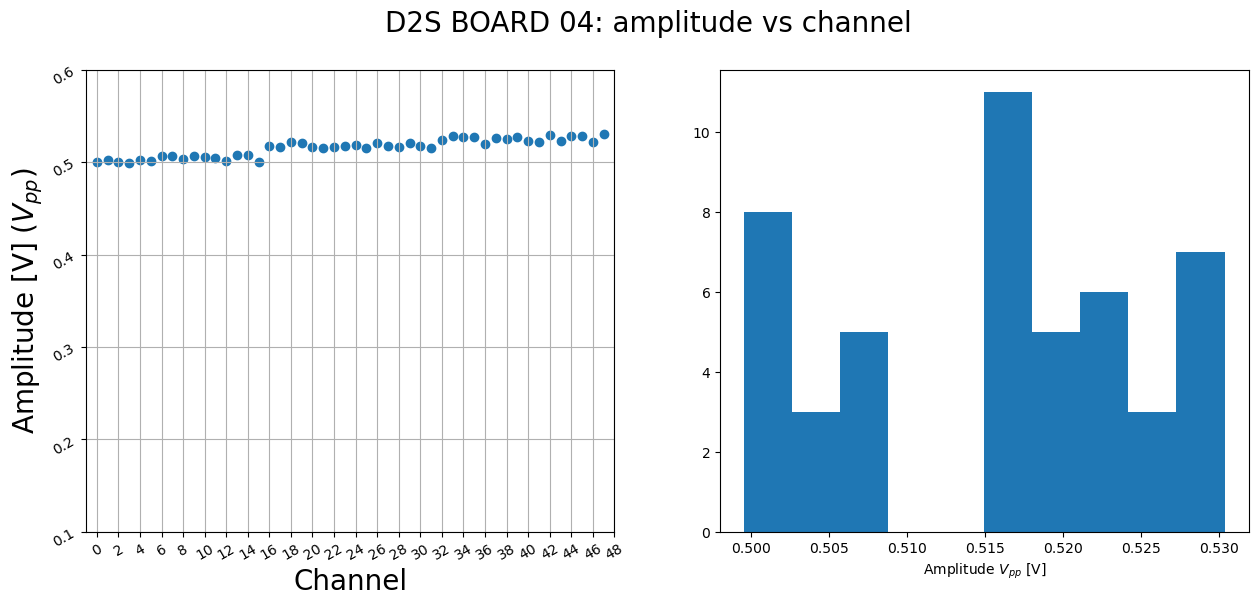

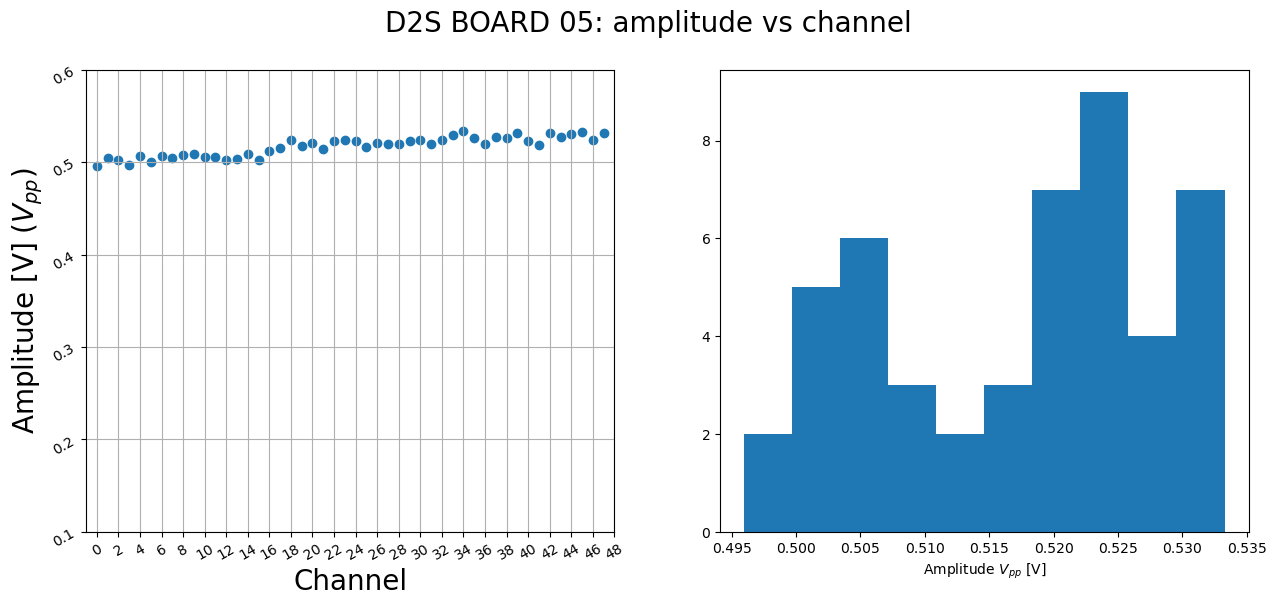

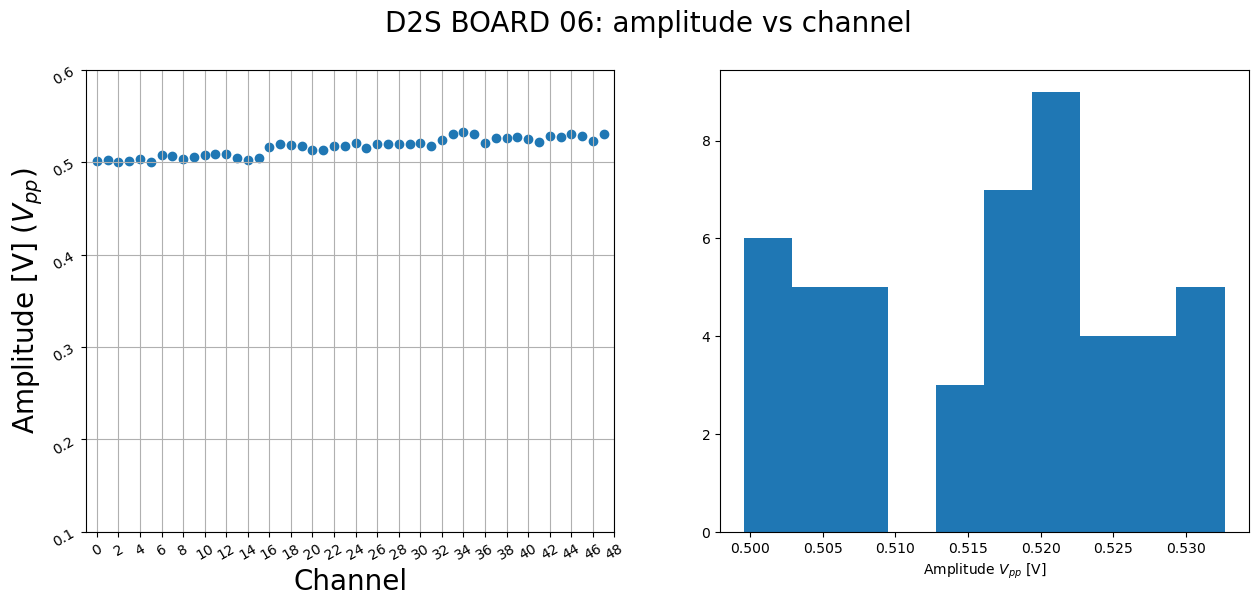

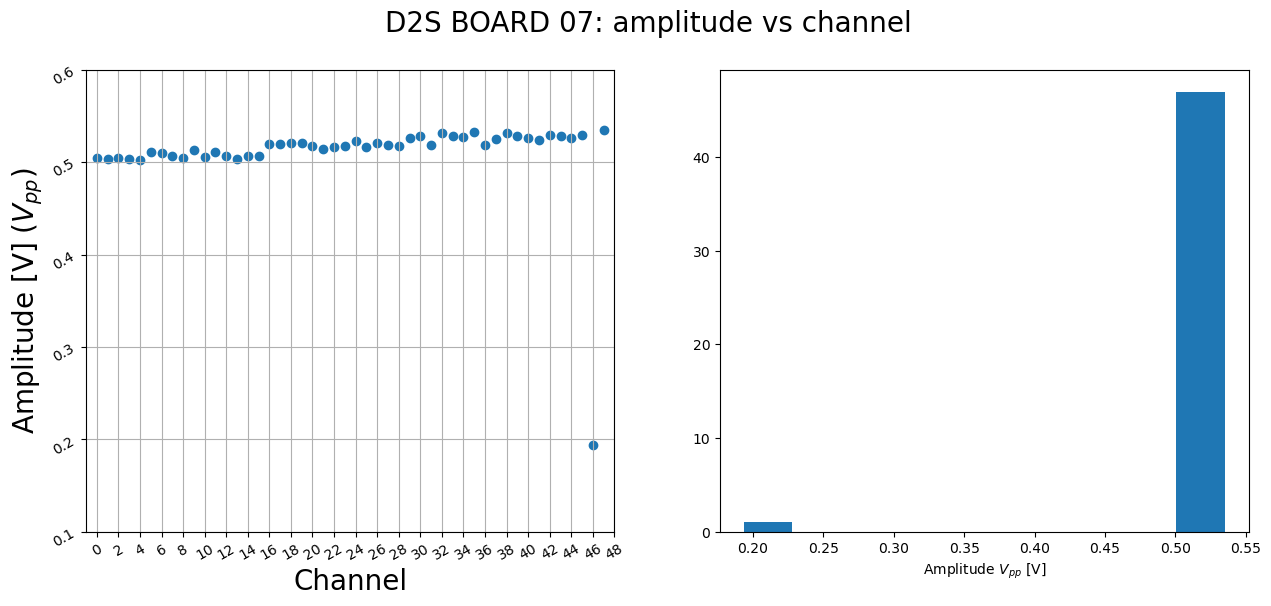

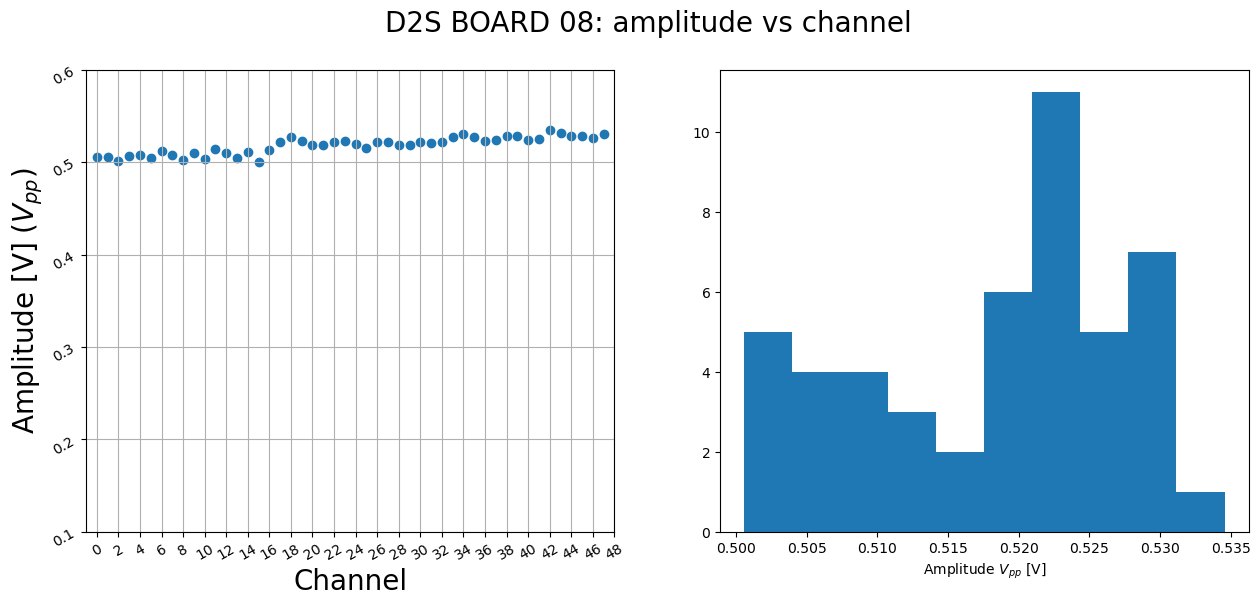

In [50]:
#PLOT AMPLITUDE (y) FOR EACH CHANNEL (x)
for D2S in D2Ss:
    address = address_selected
    
    

    x = []
    y = []
    for i, df in enumerate(all_df):
        amplitude = np.max(df['Channel 3 (V)']) -  np.min(df['Channel 3 (V)'])
        x.append(i)
        y.append(amplitude)
    plot_double(x,y, str(D2S), save= True, address_save="C:\\Users\\User\\Desktop\\flab\\D2S tests\\cmb03_wrd01\\amplitude channel\\D2S_"+ str(D2S)+".png")
    

In [62]:
def plot_double_time(x, y, name,legend = False, save = False, address_save = None):

    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15,6))
    ax1.scatter(x, y)
    ax1.set_xlabel("Channel", fontsize=20)
    ax1.set_ylabel("Period [ms]", fontsize=20)
    ax1.grid()
    ax1.xaxis.set_major_locator(tck.MultipleLocator(2))
    ax1.tick_params(rotation = 30)
    ax1.set_xlim(-1,48)
    
    ax2.hist(y)
    ax2.set_xlabel("Period [ms]")
    fig.suptitle(f"D2S BOARD {name}: period vs channel", fontsize=20)

    if legend:
        ax1.legend()
    if save:
        plt.savefig(address_save)


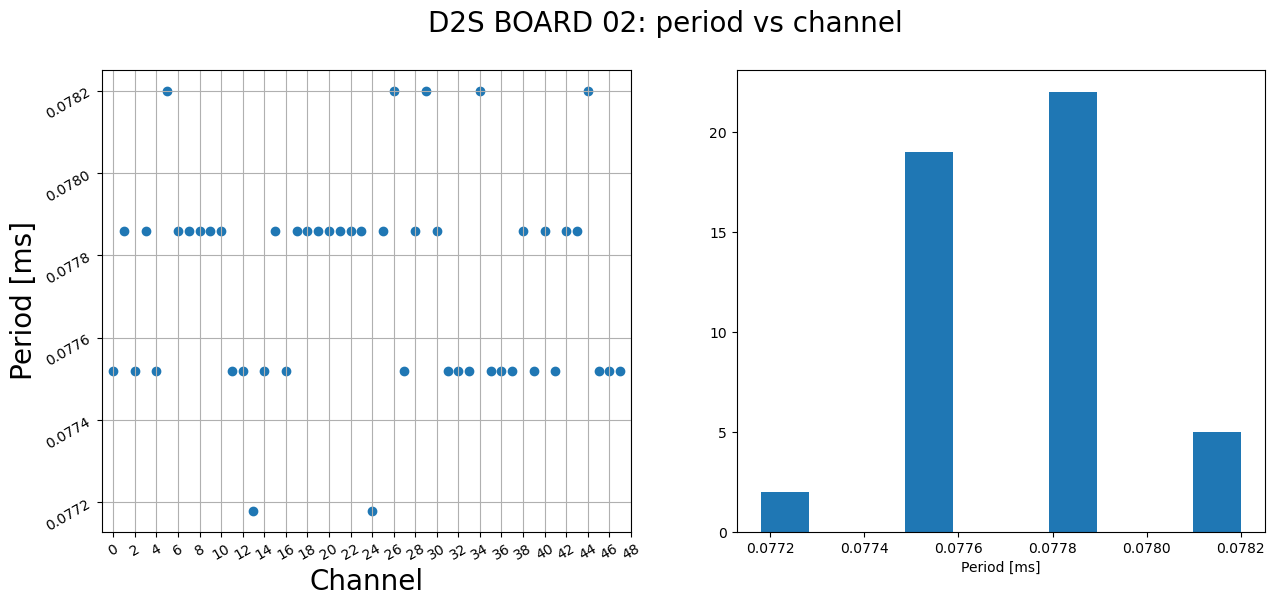

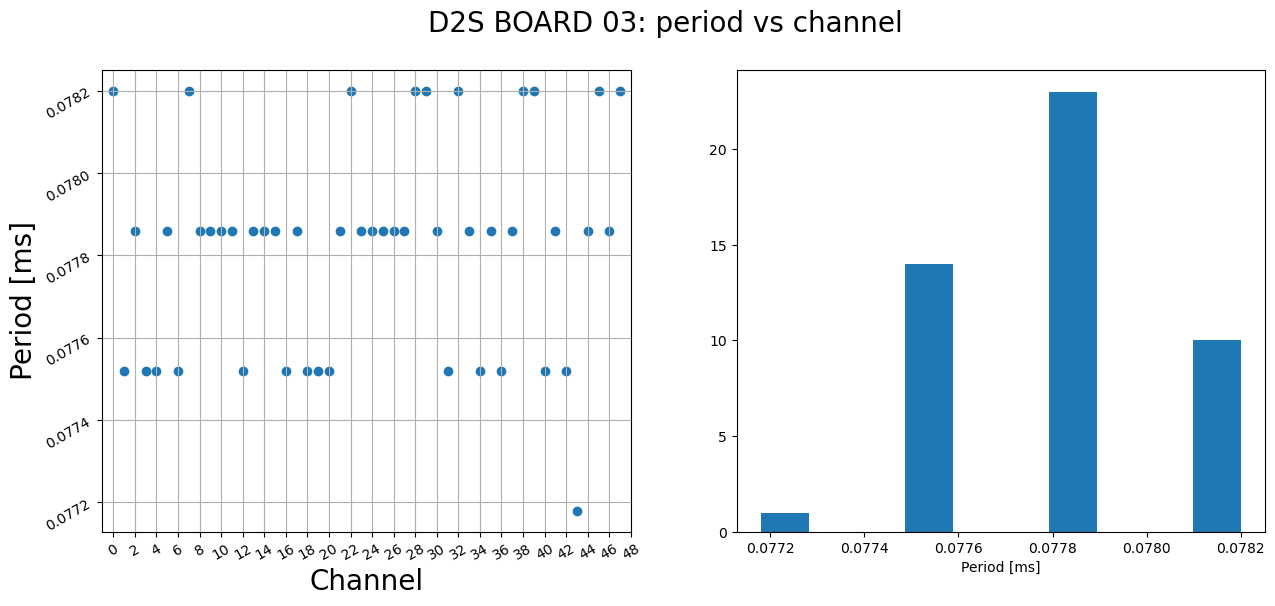

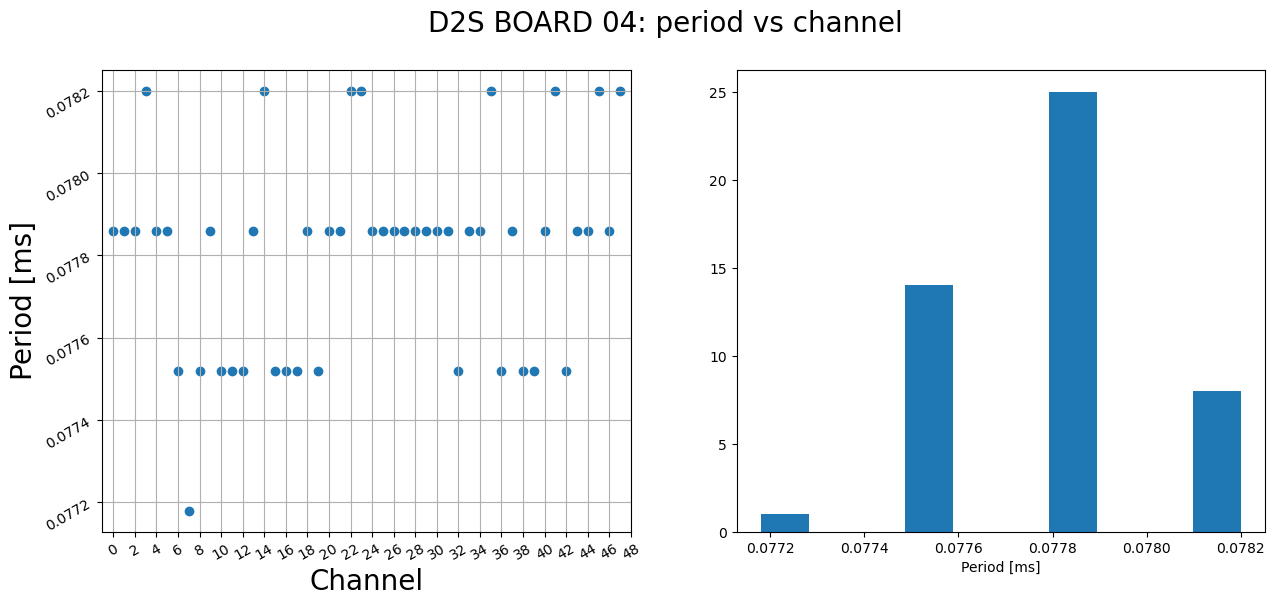

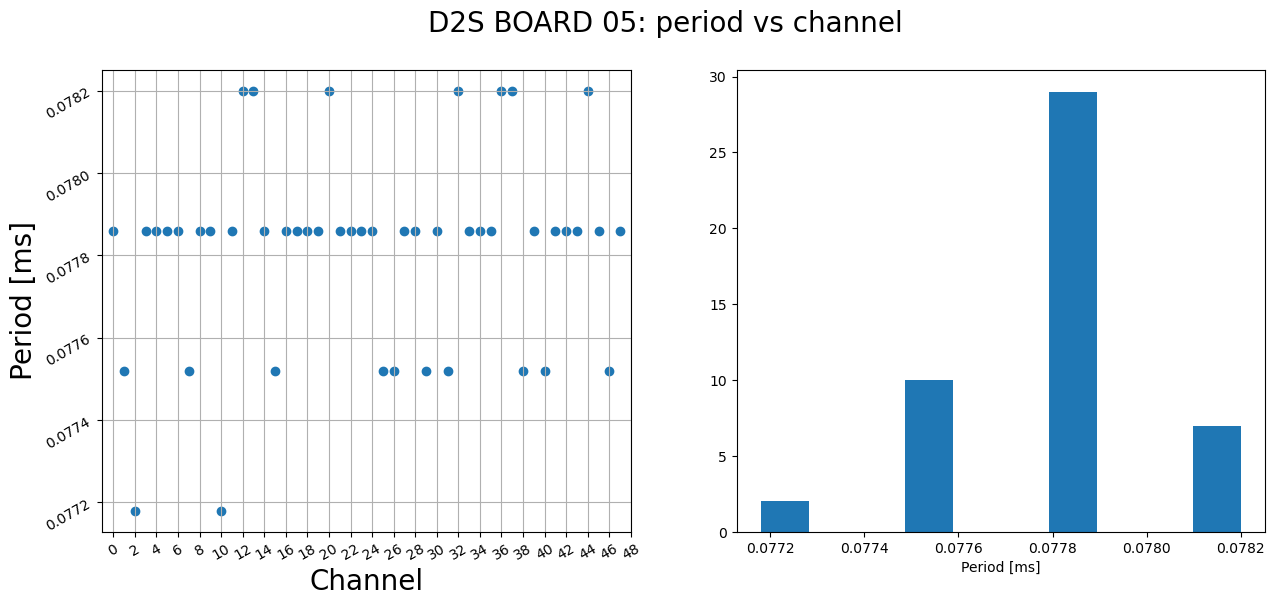

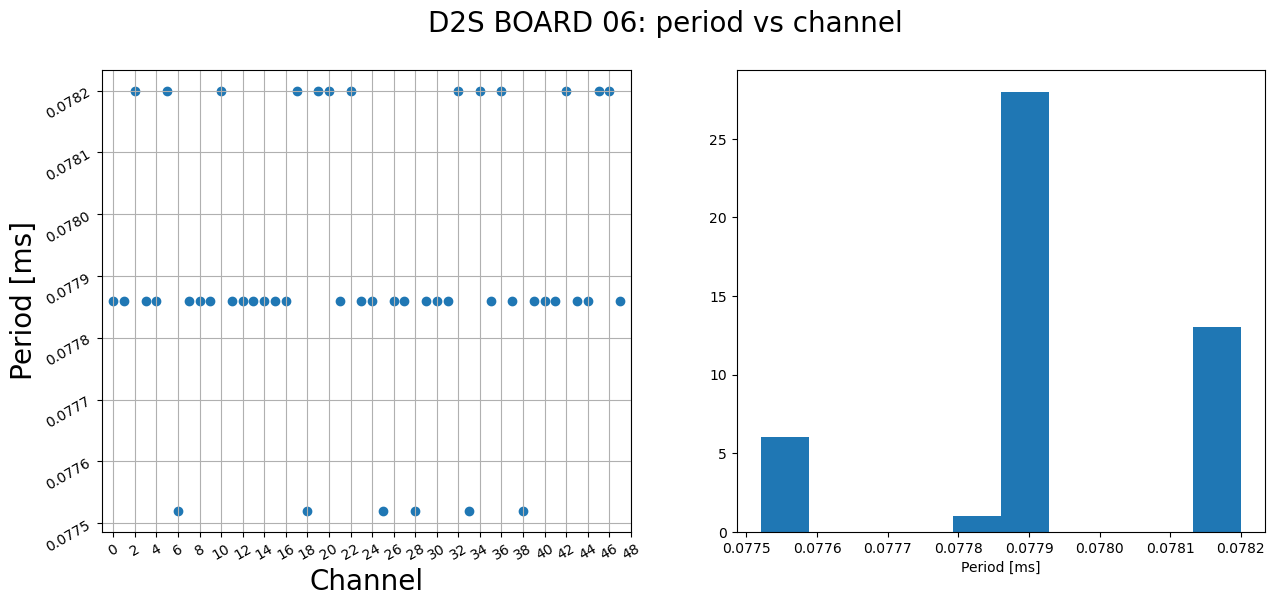

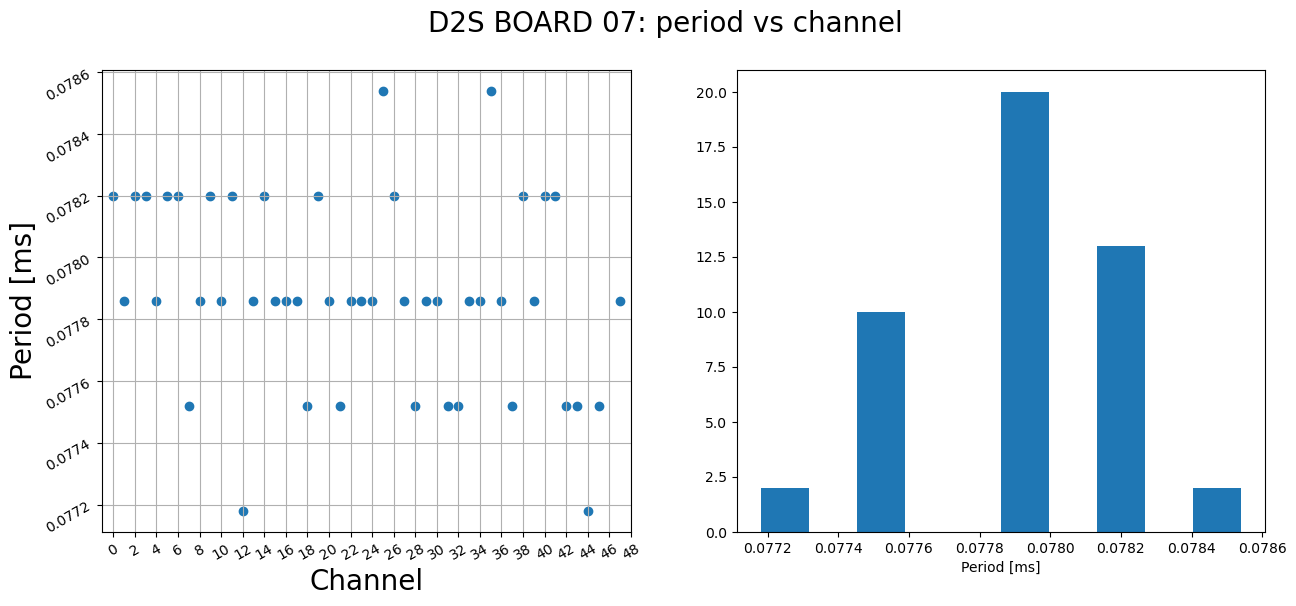

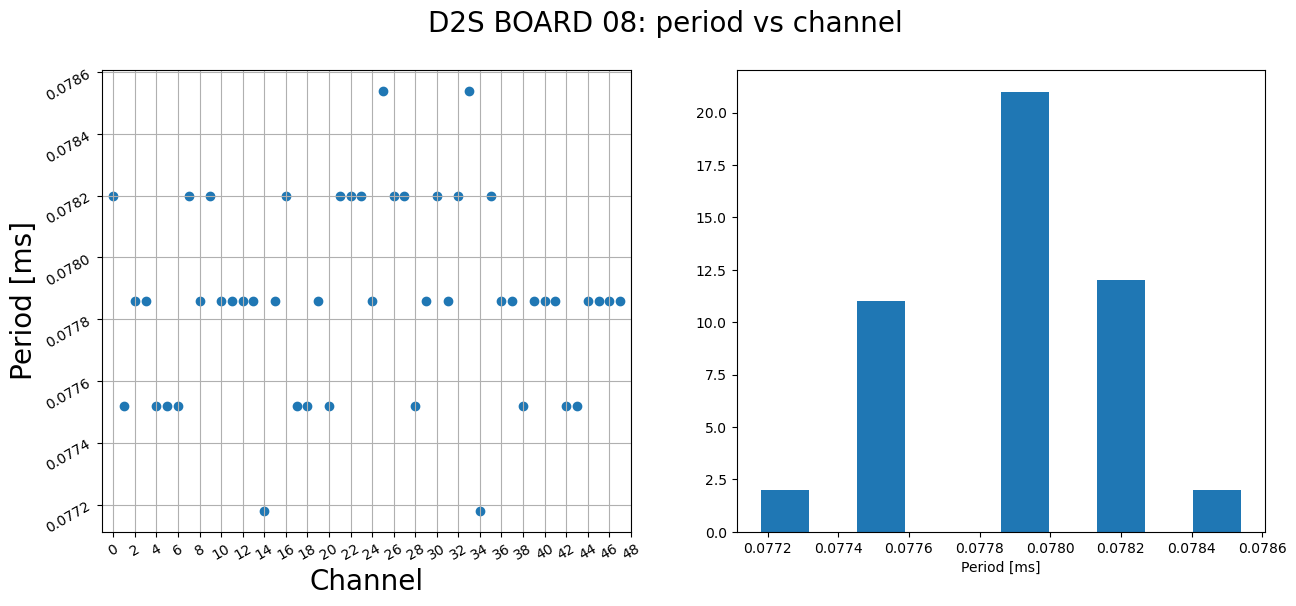

In [63]:
#PLOT period (y) FOR EACH CHANNEL (x)
for D2S in D2Ss:
    address = address_selected

    x ,y= [], []   
    
    for channel, df in enumerate(all_df):
        signal = np.array(df['Channel 3 (V)'].to_list())
        time = df["Time (s)"].to_list()    
        peaks_up = find_peaks(signal, prominence=0.15)
        peaks_dw = find_peaks(-signal, prominence= 0.15)
        
        try:
            if peaks_up[0][0] > peaks_dw[0][0]:
        
                period = (time[int(peaks_dw[0][1])]-time[int(peaks_up[0][0])])*1e3
            else:
                period = (time[int(peaks_up[0][0])]- time[int(peaks_dw[0][0])])*1e3
        except IndexError:
            continue    

        x.append(channel)
        y.append(period)

    plot_double_time(x,y, str(D2S), save= True, address_save="C:\\Users\\User\\Desktop\\flab\\D2S tests\\cmb03_wrd01\\period channel\\D2S_"+ str(D2S)+".png")

    